# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 모델을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 텐서를 입력 받고 출력하는 형식으로 모델을 구현한다.
    - 코드상에서는 Layer를 입력받는 형식으로 작성한다.


```
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

## Sequential, Functional API 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

### Sequential

In [3]:
seq_model = keras.Sequential()
seq_model.add(layers.Input(shape=(32,32,3)))
seq_model.add(layers.Conv2D(filters=64,
                            kernel_size=3,
                            padding='same',
                            activation='relu'))
seq_model.add(layers.Flatten())
seq_model.add(layers.Dense(units=256, activation='relu'))
seq_model.add(layers.Dense(units=10, activation='softmax', name='output_layer'))
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16777472  
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 16,781,834
Trainable params: 16,781,834
Non-trainable params: 0
_________________________________________________________________


### Functional

In [11]:
input_tensor = layers.Input(shape=(32,32,3))
conv_tensor = layers.Conv2D(filters=64,
                     kernel_size=3,
                     padding='same',
                     activation='relu')(input_tensor)
pool_tensor = layers.MaxPool2D(padding='same')(conv_tensor)
flatten_tensor = layers.Flatten()(pool_tensor)

dense_tensor = layers.Dense(units=256, activation='relu')(flatten_tensor)
dense_tensor2 = layers.Dense(units=128)(dense_tensor)

bn_tensor = layers.BatchNormalization()(dense_tensor2)
relu_tensor = layers.ReLU()(bn_tensor)

output_tensor = layers.Dense(units=10, activation='softmax')(dense_tensor)

fn_model = models.Model(input_tensor, output_tensor) #(입력텐서, 출력텐서)

fn_model.summary()


dense_tensor2

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 4,198,922
Trainable params: 4,198,922
Non-trainable params: 0
_________________________________________________

<tf.Tensor 'dense_12/Identity:0' shape=(None, 128) dtype=float32>

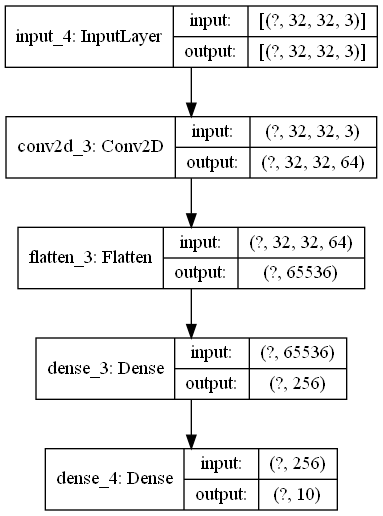

In [7]:
keras.utils.plot_model(fn_model, show_shapes=True)

In [15]:
input_tensor = layers.Input(shape=(32,32,3))
x = layers.Conv2D(filters=64,
                  kernel_size=3,
                  padding='same',
                  activation='relu')(input_tensor)
x = layers.MaxPool2D(padding='same')(x)

x = layers.Flatten()(x)

x = layers.Dense(units=256, activation='relu')(x)
x = layers.Dense(units=128)(x)

x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

output_tensor = layers.Dense(units=10, activation='softmax')(x)

fn_model = models.Model(input_tensor, output_tensor) #(입력텐서, 출력텐서)

fn_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512 

## 레이어를 합치는 함수
- concatenate(list, axis=-1)
    - 레이어들을 합친다
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- add(list), substract(list), multiply(list)
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [17]:
# Residual block
input_tensot = layers.Input((32,32,3))
x = layers.Conv2D(64, kernel_size=3,
                  padding='same', activation='relu')(input_tensor)
x1 = layers.Conv2D(64, kernel_size=3,
                   padding='same')(x)
b1 = layers.BatchNormalization()(x1)
add1 = layers.add([x, b1])
r = layers.ReLU()(add1)

r_block_model = models.Model(input_tensor, r)

In [18]:
r_block_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 32, 32, 64)   1792        input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 64)   36928       conv2d_14[0][0]                  
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 32, 32, 64)   256         conv2d_15[0][0]                  
____________________________________________________________________________________________

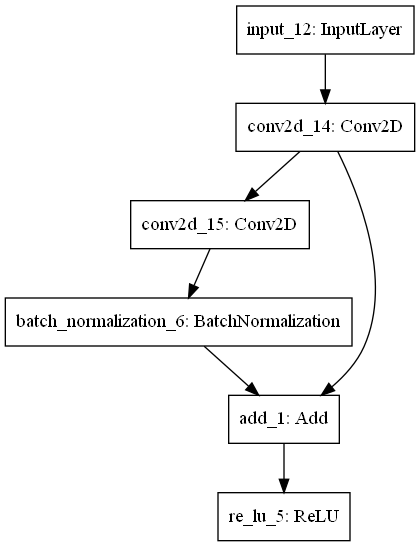

In [19]:
keras.utils.plot_model(r_block_model)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃입의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류